In [ ]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/sanskar457/fraud-transaction-detection")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: donkeysally
Your Kaggle Key: ··········


100%|██████████| 34.0M/34.0M [00:00<00:00, 77.2MB/s]


In [ ]:
exit()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# EDA

In [ ]:
col = ['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID',
       'TERMINAL_ID', 'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS',
       'TX_FRAUD', 'TX_FRAUD_SCENARIO']
df = pd.read_csv('/content/fraud-transaction-detection/Final Transactions.csv',
                  usecols = col, parse_dates = ['TX_DATETIME'] )

In [ ]:
df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   TRANSACTION_ID     int64         
 1   TX_DATETIME        datetime64[ns]
 2   CUSTOMER_ID        int64         
 3   TERMINAL_ID        int64         
 4   TX_AMOUNT          float64       
 5   TX_TIME_SECONDS    int64         
 6   TX_TIME_DAYS       int64         
 7   TX_FRAUD           int64         
 8   TX_FRAUD_SCENARIO  int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 120.4 MB


In [ ]:
catcol = ['CUSTOMER_ID', 'TERMINAL_ID', 'TX_FRAUD', 'TX_FRAUD_SCENARIO']
df[catcol] = df[catcol].astype('category')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TRANSACTION_ID,1754155.0,8.770770e+05,5.063811e+05,0.0,438538.50,877077.00,1.315616e+06,1754154.0
TX_AMOUNT,1754155.0,5.396820e+02,1.179711e+03,0.0,179.95,421.75,7.505950e+02,647837.5
TX_TIME_SECONDS,1754155.0,7.903234e+06,4.565172e+06,31.0,3940846.50,7902670.00,1.186566e+07,15811197.0
TX_TIME_DAYS,1754155.0,9.097260e+01,5.283709e+01,0.0,45.00,91.00,1.370000e+02,182.0


In [ ]:
analyze = pd.DataFrame({
    'No_Unique' : df.nunique(),
    'NaN' : df.isna().sum(),
    'Missing' : df.isnull().sum(),
    'Duplicated' : df.duplicated().sum()
})

analyze

,No_Unique,NaN,Missing,Duplicated
TRANSACTION_ID,1754155,0,0,0
TX_DATETIME,1635076,0,0,0
CUSTOMER_ID,4990,0,0,0
TERMINAL_ID,10000,0,0,0
TX_AMOUNT,177586,0,0,0
TX_TIME_SECONDS,1635076,0,0,0
TX_TIME_DAYS,183,0,0,0
TX_FRAUD,2,0,0,0
TX_FRAUD_SCENARIO,4,0,0,0


In [ ]:
FraudDf = df.query('TX_FRAUD != 0').copy()

Text(0.5, 0, 'Month')

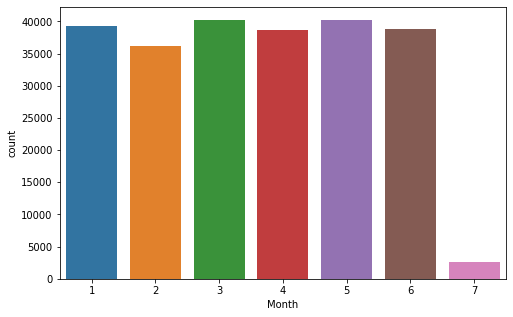

In [ ]:
plt.figure(figsize = (8,5)) 
sns.countplot(x = FraudDf.TX_DATETIME.dt.month)
plt.xlabel('Month')

Text(0.5, 0, 'Day of week')

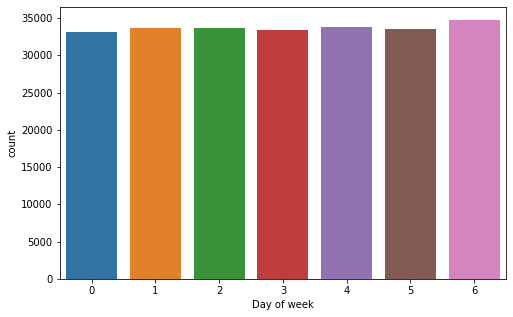

In [ ]:
plt.figure(figsize = (8,5)) 
sns.countplot(x = FraudDf.TX_DATETIME.dt.dayofweek)
plt.xlabel('Day of week')

Text(0.5, 0, 'Hour')

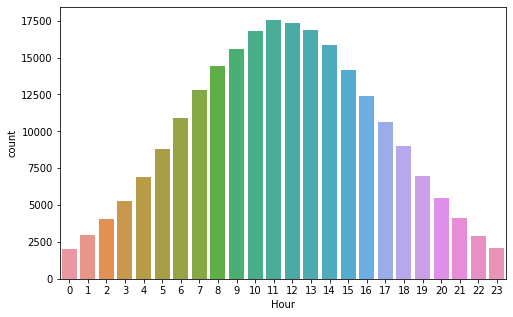

In [ ]:
plt.figure(figsize = (8,5)) 
sns.countplot(x = FraudDf.TX_DATETIME.dt.hour)
plt.xlabel('Hour')

Text(0.5, 0, 'FRAUD_SCENARIO')

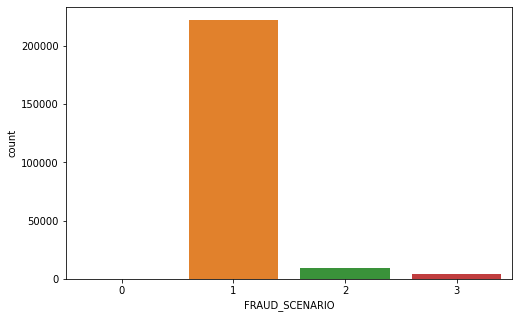

In [ ]:
plt.figure(figsize = (8,5)) 
sns.countplot(x = FraudDf.TX_FRAUD_SCENARIO)
plt.xlabel('FRAUD_SCENARIO')

Text(0.5, 0, 'FRAUD_SCENARIO')

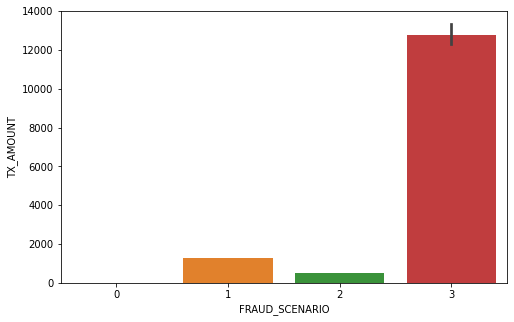

In [ ]:
plt.figure(figsize = (8,5)) 
sns.barplot(x = FraudDf.TX_FRAUD_SCENARIO,
            y = FraudDf.TX_AMOUNT)
plt.xlabel('FRAUD_SCENARIO')

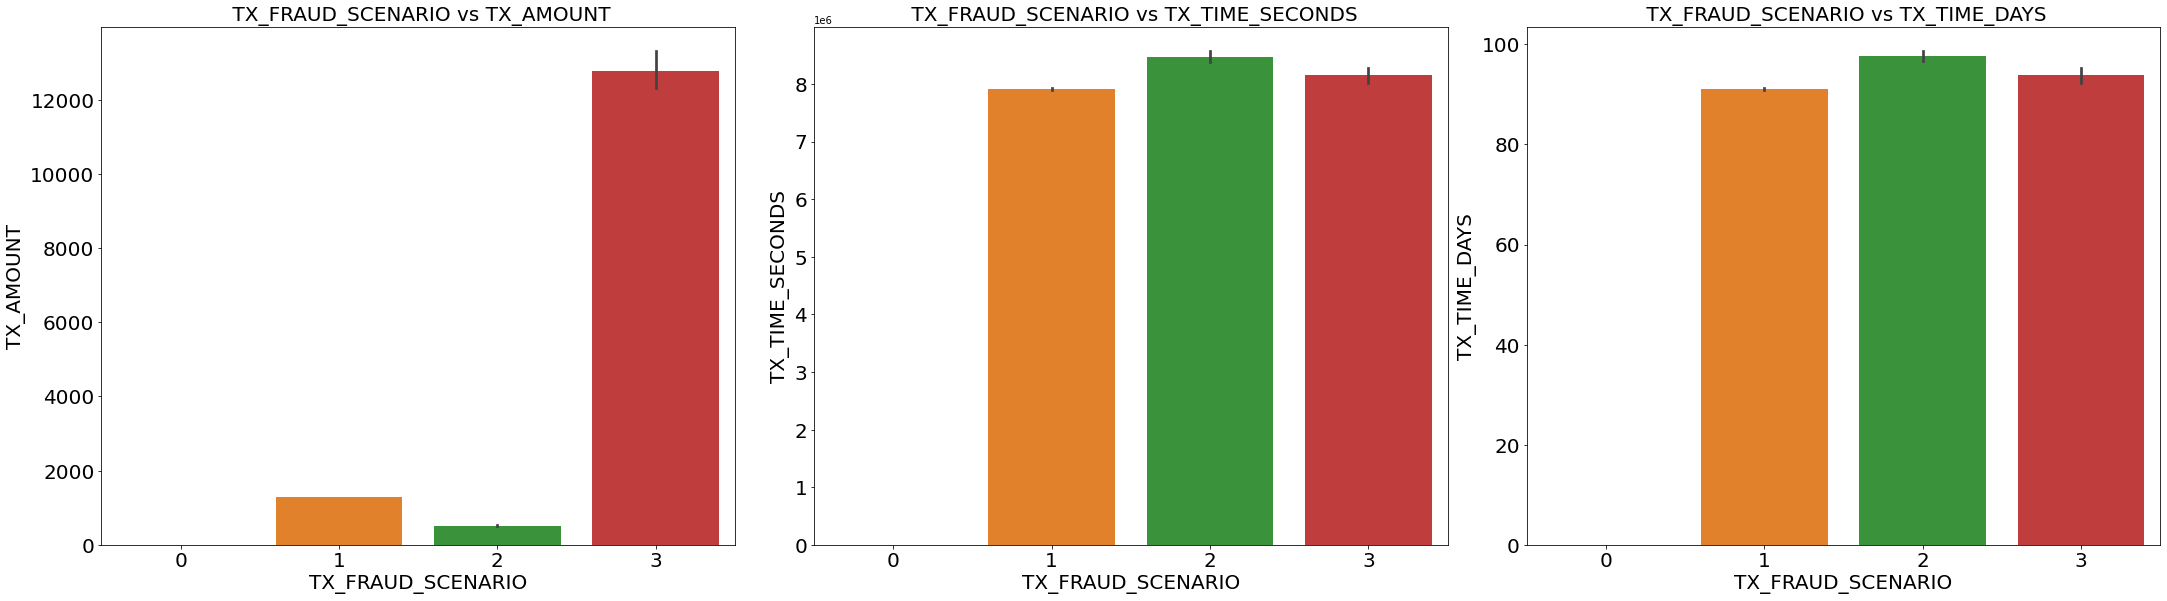

In [ ]:
FraudCharac = ['TX_AMOUNT',	'TX_TIME_SECONDS',	'TX_TIME_DAYS']

plt.figure(figsize = (50,80))
for i, col in enumerate(FraudCharac):
  axes = plt.subplot(10, 5, i+1)
  sns.barplot(x = FraudDf.TX_FRAUD_SCENARIO, 
               y = FraudDf[col])
  plt.title(f' TX_FRAUD_SCENARIO vs {col}', fontsize = 20)
  plt.xticks(fontsize = 20)
  plt.yticks(fontsize = 20)
  plt.xlabel('TX_FRAUD_SCENARIO', fontsize = 20)
  plt.ylabel(f'{col}', fontsize = 20)
  
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Imbalance data'}, ylabel='TX_FRAUD'>

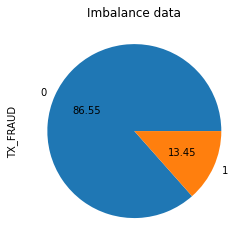

In [ ]:
#Chack balance of data 
df.TX_FRAUD.value_counts().plot.pie(autopct = '%.2f', title = 'Imbalance data')

In [ ]:
df_model = df.copy()

In [ ]:
#Create new feature
df_model['DayHour'] = df_model.TX_DATETIME.dt.hour

In [ ]:
# Subdf for further modelling 
df_model = df_model.drop(['CUSTOMER_ID', 'TERMINAL_ID','TX_DATETIME', 'TRANSACTION_ID', 'TX_FRAUD_SCENARIO'], axis = 1)

In [ ]:
df_model.head()

,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,DayHour
0,533.07,31,0,0,0
1,808.56,130,0,0,0
2,1442.94,476,0,1,0
3,620.65,569,0,0,0
4,490.66,634,0,0,0


#Modelling 

In [ ]:
X = df_model.drop('TX_FRAUD', axis=1)
y = df_model['TX_FRAUD']

In [ ]:
# Oversampling to balance the data
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='minority')
X, y = oversampler.fit_resample(X, y) 

<AxesSubplot:title={'center':'Balance data'}, ylabel='TX_FRAUD'>

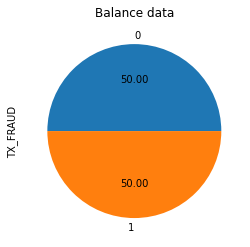

In [ ]:
y.value_counts().plot.pie(autopct = '%.2f', title = 'Balance data')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 83)

In [ ]:
num_col = list(X.select_dtypes(include = 'number').columns)
cat_col = list(X.select_dtypes(exclude = 'number').columns)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [ ]:
# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_col),
        ('cat', categorical_transformer, cat_col)
    ], remainder="passthrough")

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier

Ada = AdaBoostClassifier()
XGB = XGBClassifier()

In [ ]:
Adapipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', Ada)])

In [ ]:
XGBpipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', XGB)])

In [ ]:
from sklearn.model_selection import cross_val_score

models = [Adapipeline, XGBpipeline]
for i, model in enumerate(models):
  mod = ['Ada', 'XGB']
  cvs = cross_val_score(model, X_train, y_train, cv = 5)
  print(f'{mod[i]}: mean cross validation = {cvs.mean()*100:.2f}%')

Ada: mean cross validation = 98.26%
XGB: mean cross validation = 98.26%


In [ ]:
Adapipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['TX_AMOUNT',
                                                   'TX_TIME_SECONDS',
                                                   'TX_TIME_DAYS', 'DayHour']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [])])),
                ('model', AdaBoostClassifier())])

In [ ]:
Ada_pred = Adapipeline.predict(X_test)

###Model evaluation

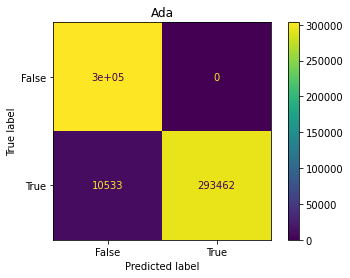

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, Ada_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                              display_labels = [False, True])
cm_display.plot()
plt.title('Ada')
plt.show()

In [ ]:
Ada_pred_prob = Adapipeline.predict_proba(X_test)

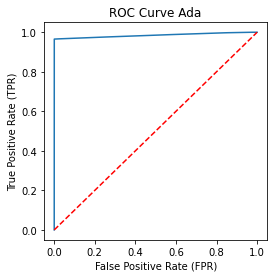

Area under the curve: 0.98


In [ ]:
from sklearn.metrics import roc_curve, auc

ll = [0,1]
ur = [0,1]

plt.figure(figsize=(4,4))
fpr, tpr, threshole = roc_curve(y_test, Ada_pred_prob[:,1])
plt.plot(fpr, tpr)
plt.plot(ll, ur, '--r')
plt.title(f'ROC Curve Ada')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid(False)
plt.show()

auc = auc(fpr, tpr)
print(f'Area under the curve: {auc:.2f}')
